# Big Mart Sales Problem

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Importing libraries

In [123]:
b_train=pd.read_csv("bigmart_train.csv")
b_test=pd.read_csv("bigmart_test.csv")

Importing files

In [124]:
b_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Sample data of trained data

In [125]:
b_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Sample data of tested data

In [126]:
print("Train:",b_train.shape)
print("Test:",b_test.shape)

Train: (8523, 12)
Test: (5681, 11)


Shape of trained and tested data

In [127]:
b_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Statistical summary of trained data

We can observe that maximum sale is around 13000 and minimum sales around 33

In [128]:
b_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can observe missing values

In [129]:
b_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can obesrve missing values

In [130]:
b_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Column names of trained data

In [131]:
b_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Columns of tested data. We can observe that columns of trained and tested data are same except label

In [132]:
b_train['Source']='Train'#every train data it shows source as train
b_test['Source']='Test' #every test data it shows sourcr as test
big=pd.concat([b_train,b_test],ignore_index=True)

As we observe that columns of trained and test data are same except label. So I concatenate two dataframe into one dataframe.

In [133]:
big.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source'],
      dtype='object')

we can observe that a new column name 'Source'

In [134]:
big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


We can obeserve new column is created

In [135]:
big.shape

(14204, 13)

number of rows and columns after concatenating

In [136]:
big.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

We have missing data in concatenated data. here we can observe that our target columns contain missing values. it is because our tested data does not contain that column.

# EDA

# Univariate Analysis

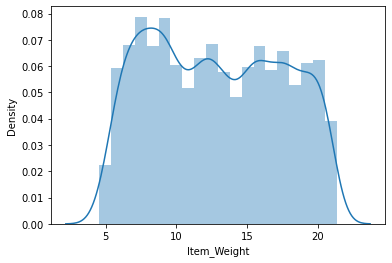

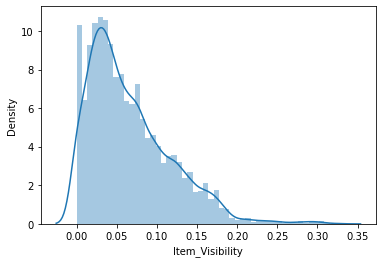

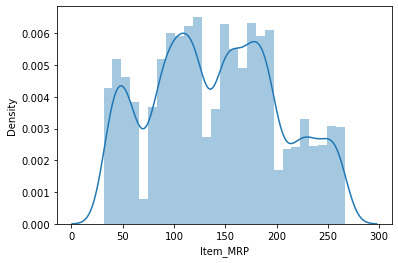

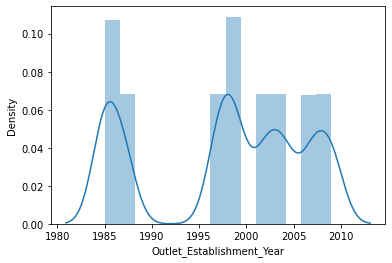

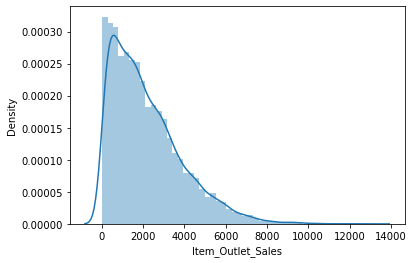

In [137]:
for i in b_train.describe().columns:
    sns.distplot(b_train[i])
    plt.show()

We can observe the distribution of numerical columns.Item visibility is right skewed,in 1990 to 1995 there is no establishment of outlets.And most of the item outlet sales are upto 7000

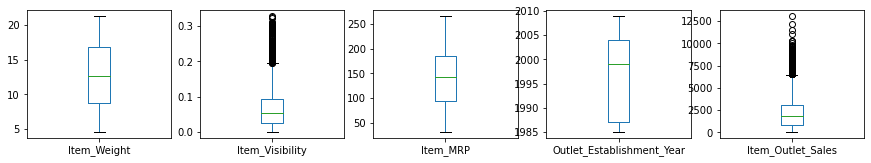

In [138]:
b_train.plot(kind='box',layout=(3,5),figsize=(15,8),subplots=True)
plt.show()

We can observe the outliers in item visbility as we observe above it is right skewed

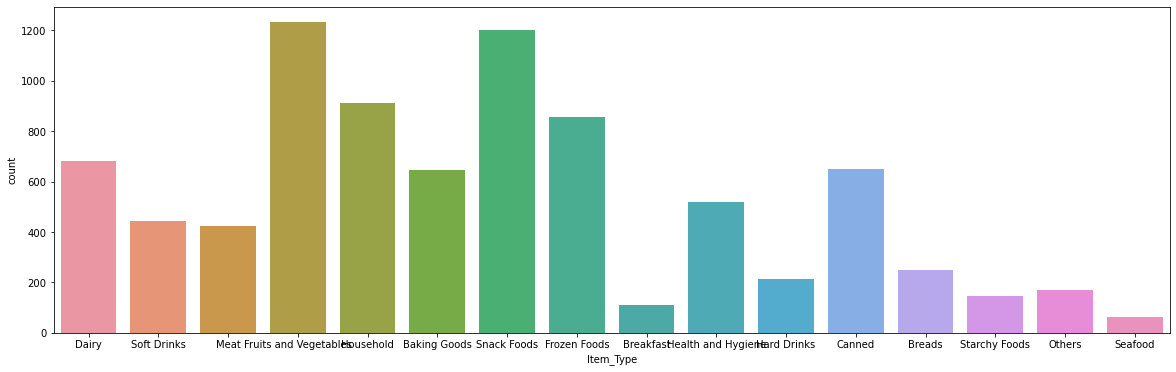

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [139]:
plt.figure(figsize=(20,6))
sns.countplot('Item_Type',data=b_train)
plt.show()
print(b_train["Item_Type"].value_counts())

We can observe the most of items are fruits and vegetables and snack foods

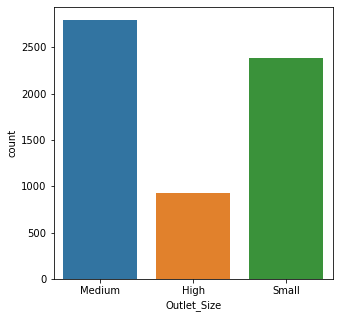

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [140]:
plt.figure(figsize=(5,5))
sns.countplot('Outlet_Size',data=b_train)
plt.show()
print(b_train["Outlet_Size"].value_counts())

We can observe medium outlet size are higher

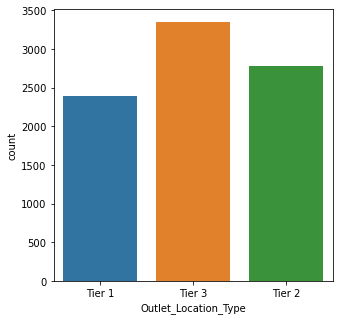

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [141]:
plt.figure(figsize=(5,5))
sns.countplot('Outlet_Location_Type',data=b_train)
plt.show()
print(b_train["Outlet_Location_Type"].value_counts())

Tier 3 outlet locations are higher 

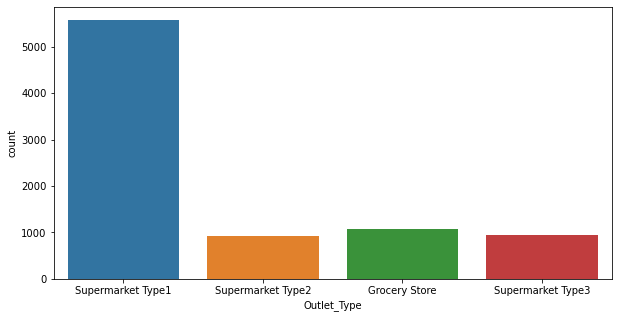

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [142]:
plt.figure(figsize=(10,5))
sns.countplot('Outlet_Type',data=b_train)
plt.show()
print(b_train["Outlet_Type"].value_counts())

Outlet type supermarkettype 1 is higher

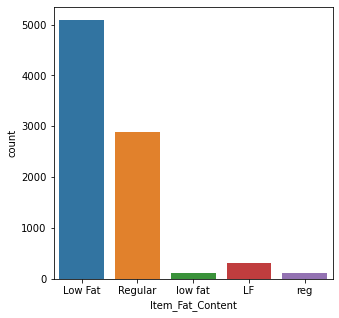

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [143]:
plt.figure(figsize=(5,5))
sns.countplot('Item_Fat_Content',data=b_train)
plt.show()
print(b_train["Item_Fat_Content"].value_counts())

We can observe that unwanted columns present for low fat and regular fat, we want to clean it.Low fat is higher 

In [144]:
big.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

Data replaced and cleaned in combined data

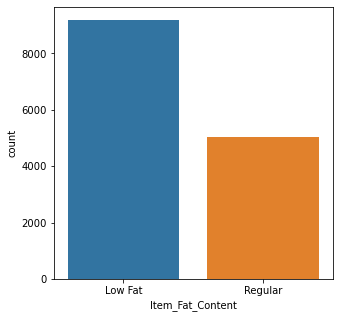

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [145]:
plt.figure(figsize=(5,5))
sns.countplot('Item_Fat_Content',data=big)
plt.show()
print(big["Item_Fat_Content"].value_counts())

low fat is higher in number than regular fat

# Biavriate Analysis

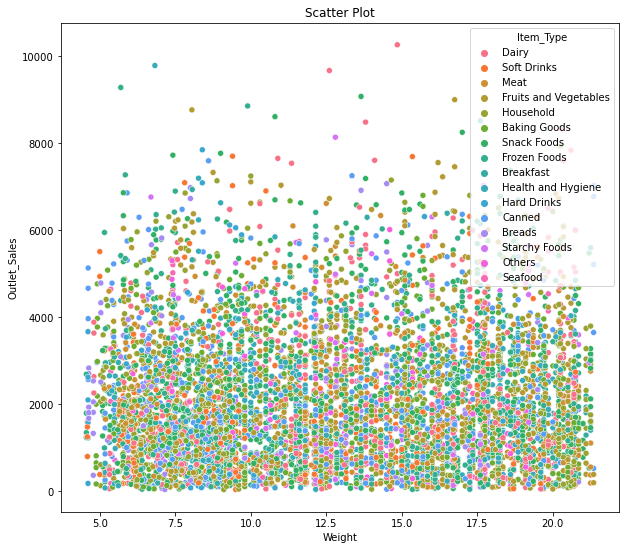

In [146]:
plt.figure(figsize=(10,9))
plt.xlabel("Weight")
plt.ylabel("Outlet_Sales")
plt.title("Scatter Plot")
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",data=b_train,hue='Item_Type')
plt.show()

We can observe that item weight does not increase in the sale of an item

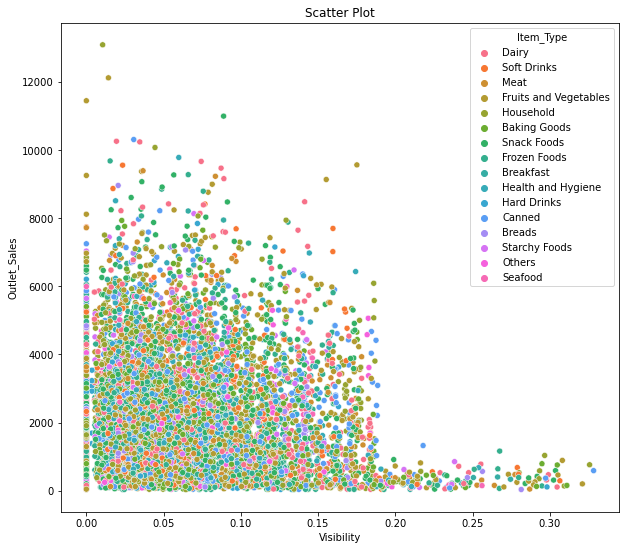

In [147]:
plt.figure(figsize=(10,9))
plt.xlabel("Visibility")
plt.ylabel("Outlet_Sales")
plt.title("Scatter Plot")
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=b_train,hue='Item_Type')
plt.show()

We can observe that item types have low visibilty but it  still have high outlet sales. When item type have high visibilty it does not affect the sales 

In [148]:
#pd.pivot_table?

In [149]:
#parameters of pivot table
#pivot table is used to compare numerical values and categorical values

In [150]:
outlet_pivot=b_train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)

We comparing numerical column with categorical volumn item outlet sales and outlet type

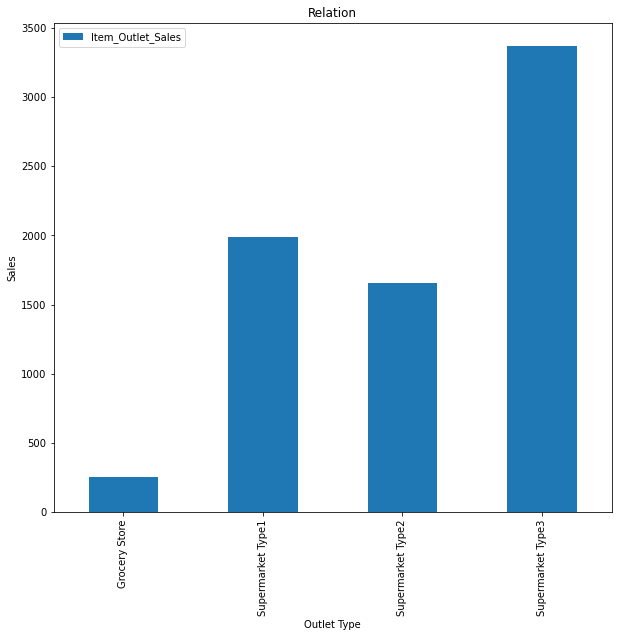

In [151]:
#plotting 
outlet_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("Outlet Type")
plt.ylabel("Sales")
plt.title("Relation")
plt.show()

We can observe that supermarket type 3 have more sales compare to other outlet types

In [152]:
fat_pivot=b_train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

comparing fat content and sales using pivot table

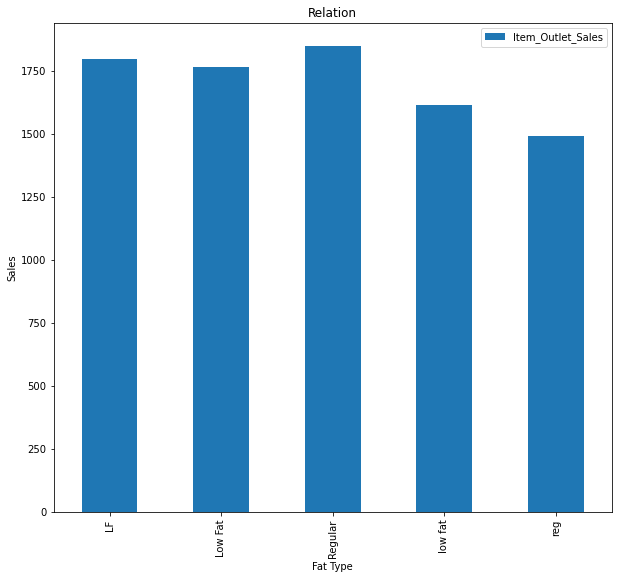

In [153]:
#plotting 
fat_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("Fat Type")
plt.ylabel("Sales")
plt.title("Relation")
plt.show()

We can observe regular fat type foods are gives impact in sales more than low fat

# Multivariate Analysis

In [154]:
b_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Item visibility and establishment year is negatively correalted to sales

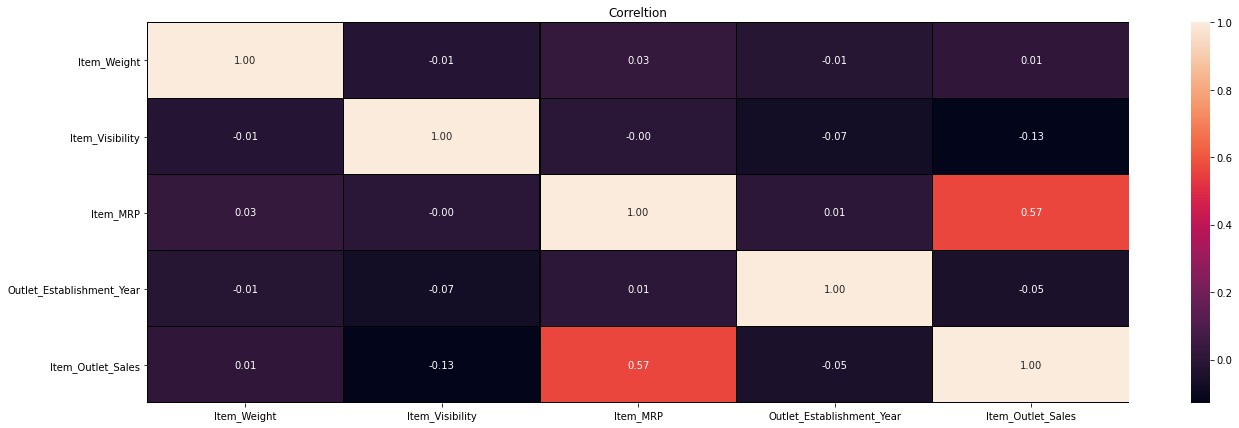

In [155]:
plt.figure(figsize=(22,7))
sns.heatmap(b_train.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.title("Correltion")
plt.show()

Item visibility and establishment year is negatively correlated and item weight is less correlated and item mrp is highly correlated to our target variable item outlet sales

# Treating Missing Values

In [156]:
big.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

We can observe missing values in combined data,we have to treat it.Also here Item outlet sales also contain missing values it is beacuse we combined trained and tested data, in tested data there is no target column so it shows missing values. 

In [157]:
big['Item_Weight'].mean()

12.792854228644991

Mean of the column which have missing values

In [158]:
big['Item_Weight'].fillna(big['Item_Weight'].mean(),inplace=True)

Treated missing value with mean

In [159]:
big['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Here medium contains high frequency of data

In [160]:
big['Outlet_Size'].fillna(big['Outlet_Size'].mode()[0],inplace=True)

Treated missing values with mode

In [161]:
big.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

Now we can observe there is no missing values

# Feature Cleaning

Item visibility minimum value is zero it means the item is does not seeing by customers. AS we observe the distribution item visibility is right skewed so we cannot apply mean. So we can apply median 

In [162]:
big[big['Item_Visibility']==0]['Item_Visibility'].value_counts()

0.0    879
Name: Item_Visibility, dtype: int64

879 datas are present with value zero

In [163]:
big['Item_Visibility'].fillna(big['Item_Visibility'].median(),inplace=True)

We have filled zero with mean

In [164]:
big['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

We can observe that in 2009 was last established outlet

In [165]:
big['Outlet_Years']=2009-big['Outlet_Establishment_Year']

now we can see the difference of newly established year and first established year

In [166]:
big['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

Here we can observe the minimum no of yrear as 0 and maximum upto 24

In [167]:
big['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Types of foods

In [168]:
big['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

We can observe that the identifier of item 'FD' means Food,'NC' means Non-consumable and 'DR' means Drinks we can reduce it to 3 categories instead of having so many categories

In [169]:
big['Item_ID']=big['Item_Identifier'].apply(lambda x:x[0:2])

Here we changing only the first two characters of identifier, that is identifier 'FDA15' we change the first character 'FD' and so on

In [170]:
big['Item_ID']=big['Item_ID'].map({'FD':'Food','NC':'Non Consumable','DR':'Drinks'})
print(big['Item_ID'].value_counts())

Food              10201
Non Consumable     2686
Drinks             1317
Name: Item_ID, dtype: int64


We renamed it using map function

In [171]:
big.loc[big['Item_ID']=='Non Consumable','Item_Fat_Content']="Non-Edible"
print(big['Item_Fat_Content'].value_counts())

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64


Here,non consumable products are not related to content so we add non edible to the fat content

Here we use to check which type of product is more visible to customers and more customers see higher the sales

WE can see the products and the visibility

In [172]:
big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,Item_ID
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,10,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,0,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,10,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train,11,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,22,Non Consumable


# Encoding

In [173]:
le=LabelEncoder()
big['Outlet_ID']=le.fit_transform(big['Outlet_Identifier'])#create a new column
var=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_ID','Outlet_Type']
#storing column names to encode

for i in var:
    big[i]=le.fit_transform(big[i])

Encoded our data using label encoding

In [174]:
big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,Item_ID,Outlet_ID
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,Train,10,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,Train,0,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,Train,10,1,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,Train,11,1,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,Train,22,2,1


Data after encoding

In [175]:
big=pd.get_dummies(big,columns=['Item_Fat_Content','Outlet_Location_Type',
                                'Outlet_Size','Item_ID','Outlet_Type','Outlet_ID'])

Created dummy variables for encoded data

In [176]:
big.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Source', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_ID_0', 'Item_ID_1', 'Item_ID_2',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Outlet_ID_0', 'Outlet_ID_1', 'Outlet_ID_2', 'Outlet_ID_3',
       'Outlet_ID_4', 'Outlet_ID_5', 'Outlet_ID_6', 'Outlet_ID_7',
       'Outlet_ID_8', 'Outlet_ID_9'],
      dtype='object')

We can observe that dummy variables created

In [177]:
big.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

Dropping unwanted columns

# Model Building

In [178]:
train=big.loc[big['Source']=='Train']
test=big.loc[big['Source']=='Test']

Seperated Trained and test data which combined in one dataset

In [179]:
train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_ID_0,Outlet_ID_1,Outlet_ID_2,Outlet_ID_3,Outlet_ID_4,Outlet_ID_5,Outlet_ID_6,Outlet_ID_7,Outlet_ID_8,Outlet_ID_9
0,9.300,0.016047,249.8092,3735.1380,Train,10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,443.4228,Train,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,2097.2700,Train,10,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.000000,182.0950,732.3800,Train,11,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,994.7052,Train,22,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,Train,22,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,549.2850,Train,7,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,Train,5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,1845.5976,Train,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [180]:
train.drop(['Source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)

Dropped source column from test and train data and traget variable dropped from test data

Seperating target and feature variables

In [182]:
x=train.drop('Item_Outlet_Sales', axis = 1)
y = train['Item_Outlet_Sales']

Seperated features and target

In [184]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_ID_0,Outlet_ID_1,Outlet_ID_2,Outlet_ID_3,Outlet_ID_4,Outlet_ID_5,Outlet_ID_6,Outlet_ID_7,Outlet_ID_8,Outlet_ID_9
0,9.30,0.016047,249.8092,10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,11,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,22,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [185]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [183]:
#linear regression
ln=LinearRegression()

In [200]:
for i in range(0,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    ln.fit(x_train,y_train)
    pred_train=ln.predict(x_train)
    pred_test=ln.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.5639927612072249
At random state 0,the testing accuracy is:- 0.5614524896718532


At random state 1,the training accuracy is:- 0.5631041720363859
At random state 1,the testing accuracy is:- 0.5632188656713659


At random state 2,the training accuracy is:- 0.5631291124178802
At random state 2,the testing accuracy is:- 0.5627635732599152


At random state 3,the training accuracy is:- 0.5544651387424473
At random state 3,the testing accuracy is:- 0.5901810383146641


At random state 4,the training accuracy is:- 0.5642494537745912
At random state 4,the testing accuracy is:- 0.5592216009223896


At random state 5,the training accuracy is:- 0.5632801640191514
At random state 5,the testing accuracy is:- 0.5634240165891751


At random state 6,the training accuracy is:- 0.5663017400748116
At random state 6,the testing accuracy is:- 0.5539989257993914


At random state 7,the training accuracy is:- 0.5698104967275276
At random state 7,the testing acc

At random state 71,the testing accuracy is:- 0.5668062814570138


At random state 72,the training accuracy is:- 0.5571683664450171
At random state 72,the testing accuracy is:- 0.5816145169008973


At random state 73,the training accuracy is:- 0.5687733343800538
At random state 73,the testing accuracy is:- 0.5463554865548612


At random state 74,the training accuracy is:- 0.569003892920003
At random state 74,the testing accuracy is:- 0.5453090372392448


At random state 75,the training accuracy is:- 0.563612897106059
At random state 75,the testing accuracy is:- 0.5621943809742396


At random state 76,the training accuracy is:- 0.5616463484761682
At random state 76,the testing accuracy is:- 0.5679552438641827


At random state 77,the training accuracy is:- 0.5669791384489877
At random state 77,the testing accuracy is:- 0.5521618883048425


At random state 78,the training accuracy is:- 0.5703759346595392
At random state 78,the testing accuracy is:- 0.5423350928201425


At random state 79,

At random state 135,the testing accuracy is:- 0.5740789494902818


At random state 136,the training accuracy is:- 0.5579875899998399
At random state 136,the testing accuracy is:- 0.5775469153738357


At random state 137,the training accuracy is:- 0.5616015313628357
At random state 137,the testing accuracy is:- 0.5677130714977321


At random state 138,the training accuracy is:- 0.5655809905269054
At random state 138,the testing accuracy is:- 0.556421327170231


At random state 139,the training accuracy is:- 0.5668009549789259
At random state 139,the testing accuracy is:- 0.5534892275503975


At random state 140,the training accuracy is:- 0.5615966044807229
At random state 140,the testing accuracy is:- 0.5687225981840134


At random state 141,the training accuracy is:- 0.5638799098973115
At random state 141,the testing accuracy is:- 0.5615486931321088


At random state 142,the training accuracy is:- 0.5674043098136556
At random state 142,the testing accuracy is:- 0.5506669618852904


At 

Here we splitted data into train test. Selecting best random state. Here I choose random state 123 which is least difference in r2 score  in training and testing.

In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
acc_l=r2_score(y_test,predln)
print(acc_l*100)
print("Absolute error:",mean_absolute_error(y_test,predln))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predln)))

56.829968672414466
Absolute error: 831.8611530616896
RMSE: 1111.7035338866558


Trained and predicted and find r2 score=56 and absolute error and Root mean squared error